# Base de dados com mais ações

## Imports

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
import nbformat

In [2]:
acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']
acoes_df = pd.DataFrame()

for acao in acoes:
    acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']

acoes_df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,GOLL4.SA,CVCB3.SA,WEGE3.SA,MGLU3.SA,TOTS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,14.99,11.164607,4.988705,2.058074,10.155536,47.259998
2015-01-05,14.85,11.017703,5.022718,2.096750,9.843493,46.320000
2015-01-06,15.21,10.870803,4.948212,2.069124,9.227921,46.580002
2015-01-07,14.55,10.775316,4.891521,2.138187,9.162673,48.150002
2015-01-08,14.27,10.393366,4.974128,2.121612,9.375432,48.509998
...,...,...,...,...,...,...
2025-01-27,1.71,1.860000,53.310001,7.010000,31.209999,121.870003
2025-01-28,1.71,1.770000,54.090000,6.760000,30.790001,121.029999
2025-01-29,1.69,1.800000,54.430000,6.590000,31.150000,120.169998


In [3]:
acoes_df = acoes_df.rename(columns={'GOLL4.SA': 'GOL', 'CVCB3.SA': 'CVC', 'WEGE3.SA': 'WEG', 'MGLU3.SA': 'MGLU', 'TOTS3.SA': 'TOTVS', 'BOVA11.SA': 'IBOV'})
acoes_df

,GOL,CVC,WEG,MGLU,TOTVS,IBOV
Date,,,,,,
2015-01-02,14.99,11.164607,4.988705,2.058074,10.155536,47.259998
2015-01-05,14.85,11.017703,5.022718,2.096750,9.843493,46.320000
2015-01-06,15.21,10.870803,4.948212,2.069124,9.227921,46.580002
2015-01-07,14.55,10.775316,4.891521,2.138187,9.162673,48.150002
2015-01-08,14.27,10.393366,4.974128,2.121612,9.375432,48.509998
...,...,...,...,...,...,...
2025-01-27,1.71,1.860000,53.310001,7.010000,31.209999,121.870003
2025-01-28,1.71,1.770000,54.090000,6.760000,30.790001,121.029999
2025-01-29,1.69,1.800000,54.430000,6.590000,31.150000,120.169998


In [4]:
acoes_df.isnull().sum()

GOL       0
CVC       0
WEG       0
MGLU      0
TOTVS     0
IBOV     27
dtype: int64

In [5]:
acoes_df.dropna(inplace=True)
acoes_df.shape

(2482, 6)

In [6]:
acoes_df.to_csv('acoes.csv')

In [7]:
acoes_df = pd.read_csv('acoes.csv')
acoes_df

,Date,GOL,CVC,WEG,MGLU,TOTVS,IBOV
0,2015-01-02,14.99,11.164607,4.988705,2.058074,10.155536,47.259998
1,2015-01-05,14.85,11.017703,5.022718,2.096750,9.843493,46.320000
2,2015-01-06,15.21,10.870803,4.948212,2.069124,9.227921,46.580002
3,2015-01-07,14.55,10.775316,4.891521,2.138187,9.162673,48.150002
4,2015-01-08,14.27,10.393366,4.974128,2.121612,9.375432,48.509998
...,...,...,...,...,...,...,...
2477,2025-01-27,1.71,1.860000,53.310001,7.010000,31.209999,121.870003
2478,2025-01-28,1.71,1.770000,54.090000,6.760000,30.790001,121.029999
2479,2025-01-29,1.69,1.800000,54.430000,6.590000,31.150000,120.169998
2480,2025-01-30,1.70,1.950000,56.209999,7.270000,32.610001,123.949997


In [8]:
acoes_df.columns[1:]

Index(['GOL', 'CVC', 'WEG', 'MGLU', 'TOTVS', 'IBOV'], dtype='object')

In [9]:
acoes_df.describe()

,GOL,CVC,WEG,MGLU,TOTVS,IBOV
count,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000
mean,13.045713,18.552435,21.221578,54.354839,19.295931,89.358167
std,9.458743,14.104244,15.303004,66.279906,9.528572,26.242632
min,0.980000,1.380000,4.284400,0.279106,6.457618,36.450001
25%,6.275000,6.612469,6.569133,8.731179,9.416551,64.285002
50%,10.295000,15.063796,16.623083,28.153233,19.442447,96.430000
75%,19.107501,27.519730,34.852096,63.204473,28.069101,111.129999
max,43.790001,52.870266,58.465912,256.293274,38.656746,133.619995


## Visualização

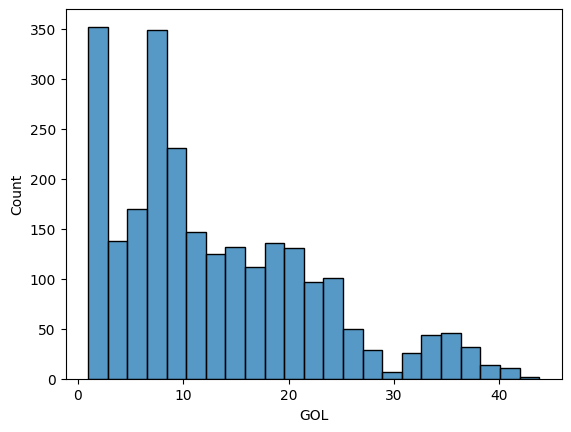

In [10]:
sns.histplot(acoes_df['GOL']);

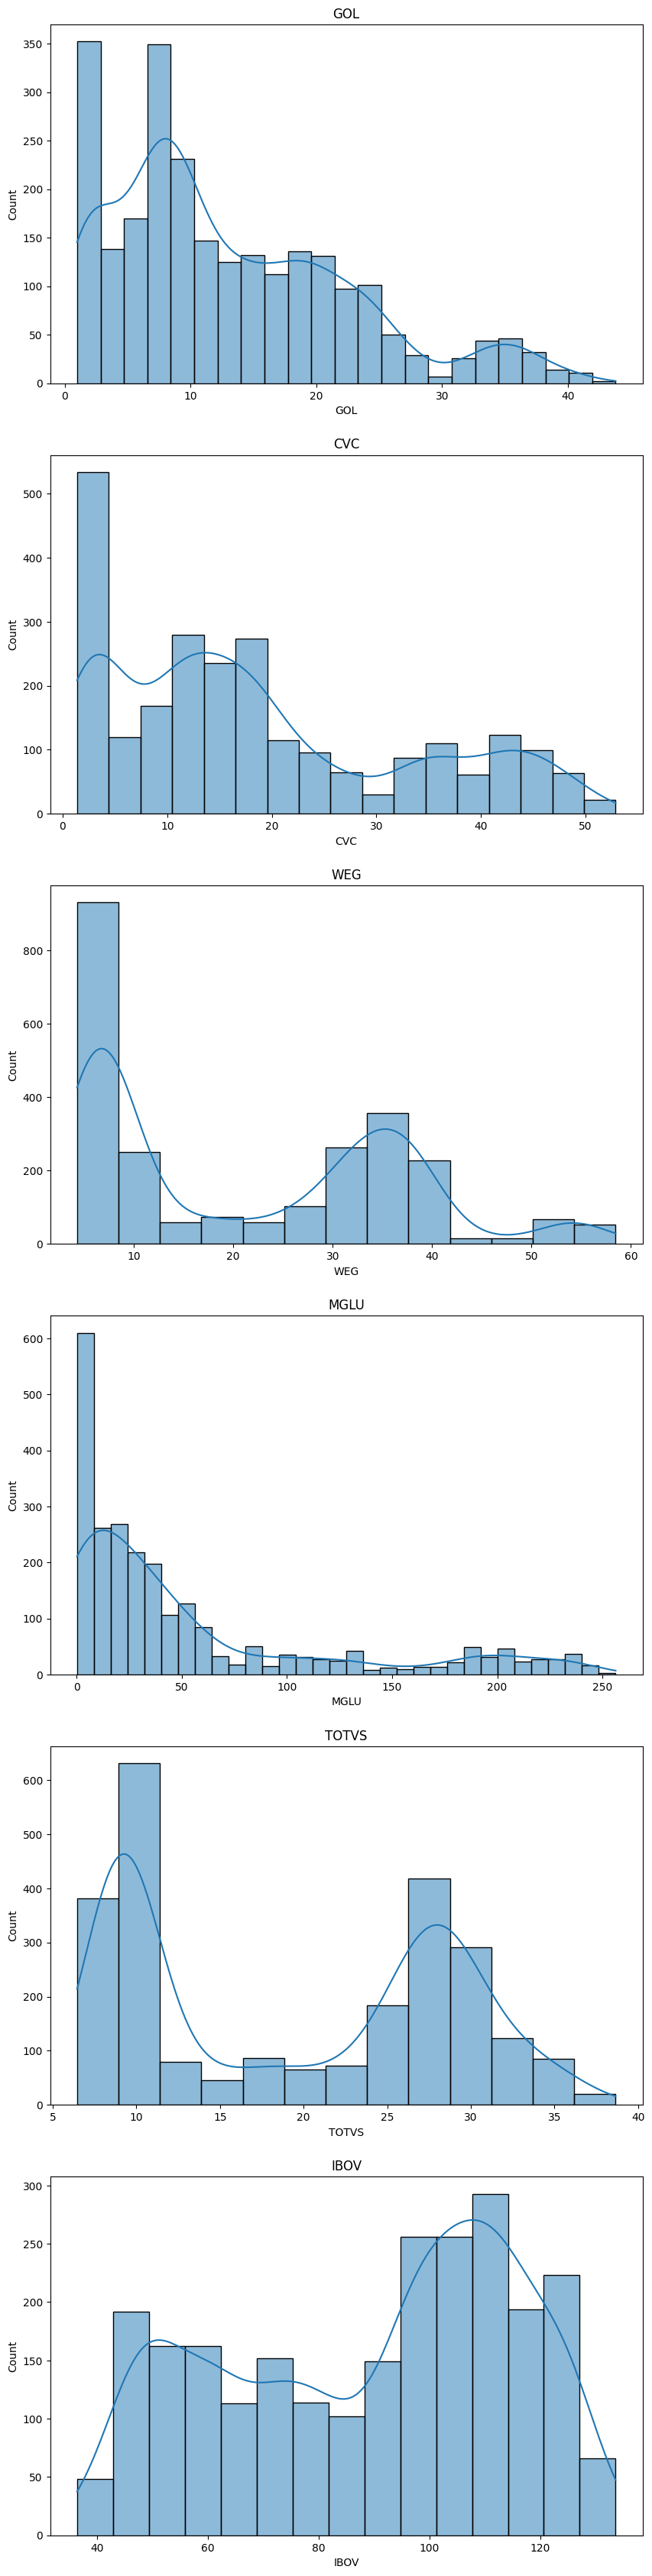

In [11]:
plt.figure(figsize=(10,50))
i = 1

for i in np.arange(1, len(acoes_df.columns)):
    plt.subplot(7, 1, i + 1)
    sns.histplot(acoes_df[acoes_df.columns[i]], kde = True)
    plt.title(acoes_df.columns[i])

## Boxplot

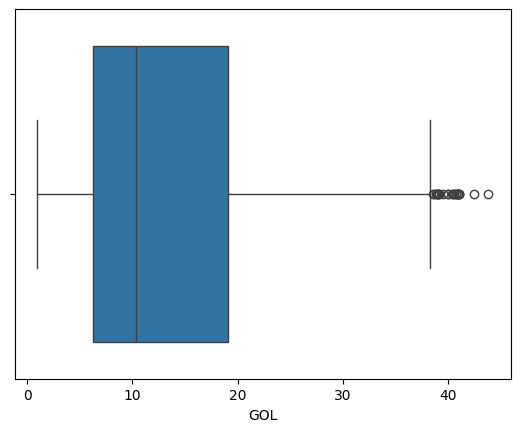

In [12]:
sns.boxplot(x = acoes_df['GOL']);

In [13]:
acoes_df['GOL'].describe()

count    2482.000000
mean       13.045713
std         9.458743
min         0.980000
25%         6.275000
50%        10.295000
75%        19.107501
max        43.790001
Name: GOL, dtype: float64

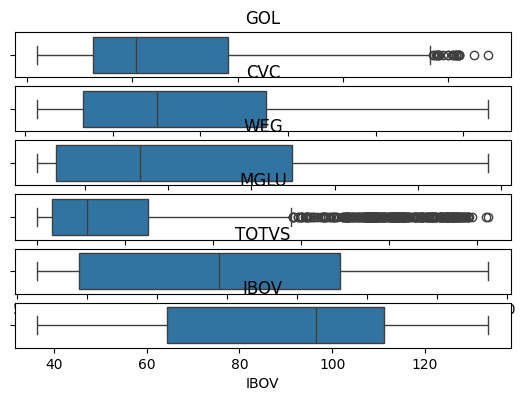

In [14]:
for i in np.arange(1, len(acoes_df.columns)):
    plt.subplot(7, 1, i + 1)
    sns.boxplot(x = acoes_df[acoes_df.columns[i]])
    plt.title(acoes_df.columns[i])

## Gráfico de Linhas

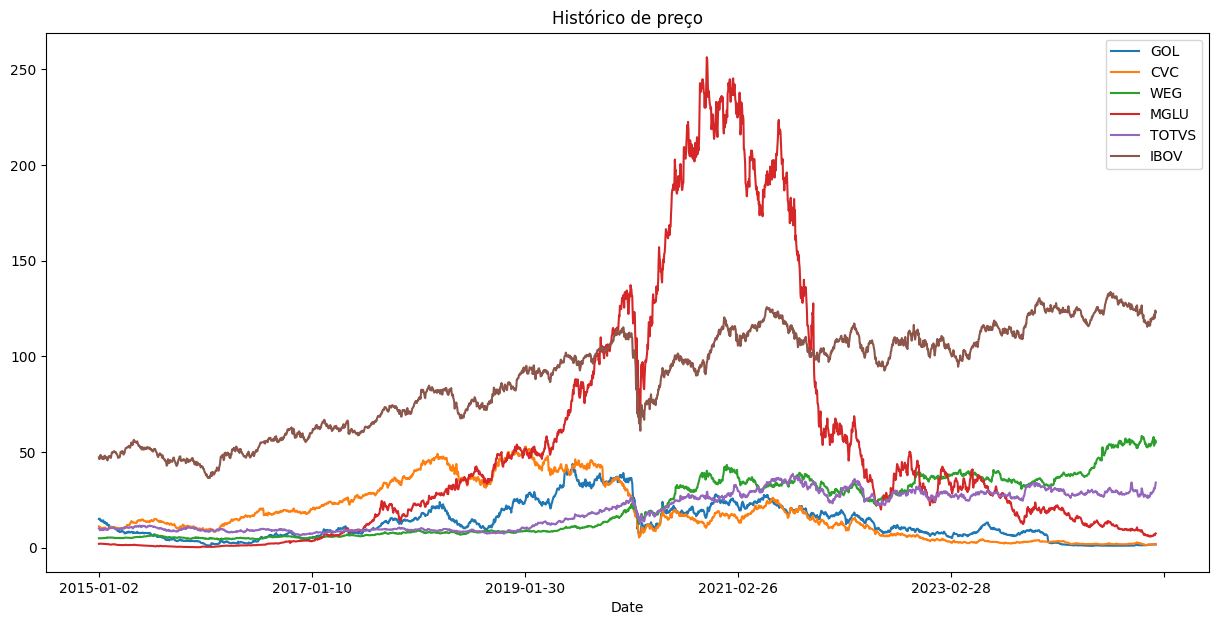

In [15]:
acoes_df.plot( x = 'Date', figsize= (15, 7), title = "Histórico de preço");

## Normalização

In [16]:
acoes_df

,Date,GOL,CVC,WEG,MGLU,TOTVS,IBOV
0,2015-01-02,14.99,11.164607,4.988705,2.058074,10.155536,47.259998
1,2015-01-05,14.85,11.017703,5.022718,2.096750,9.843493,46.320000
2,2015-01-06,15.21,10.870803,4.948212,2.069124,9.227921,46.580002
3,2015-01-07,14.55,10.775316,4.891521,2.138187,9.162673,48.150002
4,2015-01-08,14.27,10.393366,4.974128,2.121612,9.375432,48.509998
...,...,...,...,...,...,...,...
2477,2025-01-27,1.71,1.860000,53.310001,7.010000,31.209999,121.870003
2478,2025-01-28,1.71,1.770000,54.090000,6.760000,30.790001,121.029999
2479,2025-01-29,1.69,1.800000,54.430000,6.590000,31.150000,120.169998
2480,2025-01-30,1.70,1.950000,56.209999,7.270000,32.610001,123.949997


In [17]:
acoes_df_normalizado = acoes_df.copy()

for i in acoes_df_normalizado.columns[1:]:
    acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]

In [18]:
acoes_df_normalizado

,Date,GOL,CVC,WEG,MGLU,TOTVS,IBOV
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.990660,0.986842,1.006818,1.018792,0.969274,0.980110
2,2015-01-06,1.014676,0.973684,0.991883,1.005369,0.908659,0.985612
3,2015-01-07,0.970647,0.965132,0.980519,1.038926,0.902234,1.018832
4,2015-01-08,0.951968,0.930921,0.997078,1.030873,0.923184,1.026449
...,...,...,...,...,...,...,...
2477,2025-01-27,0.114076,0.166598,10.686141,3.406098,3.073201,2.578714
2478,2025-01-28,0.114076,0.158537,10.842494,3.284625,3.031844,2.560940
2479,2025-01-29,0.112742,0.161224,10.910648,3.202023,3.067293,2.542742
2480,2025-01-30,0.113409,0.174659,11.267454,3.532429,3.211057,2.622725


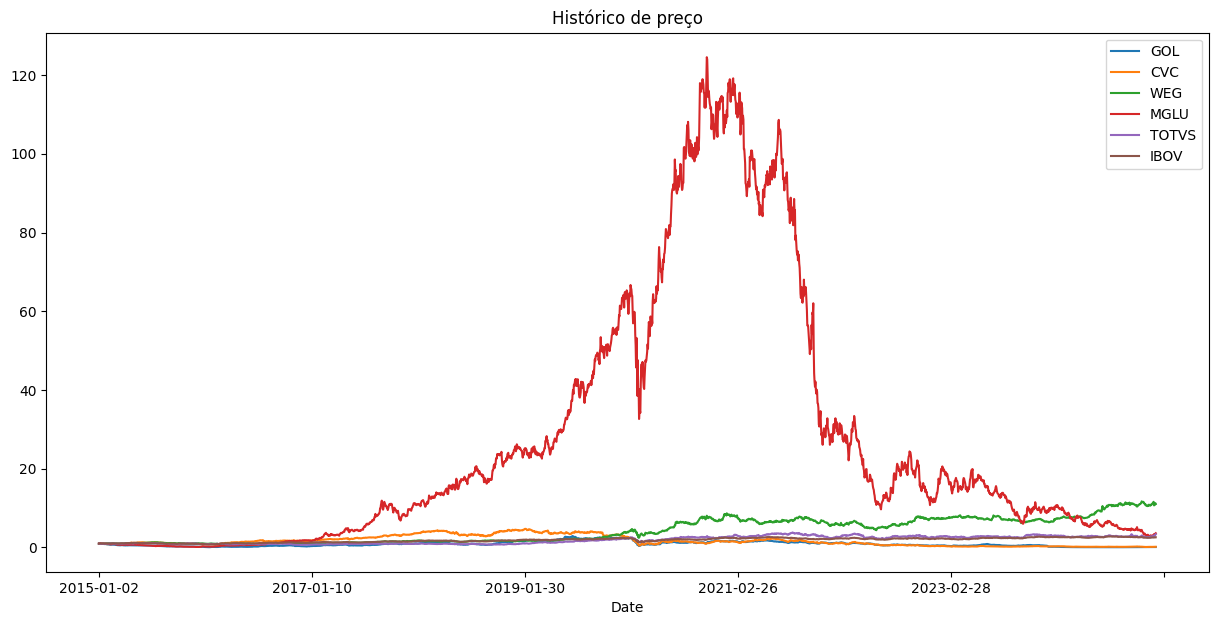

In [19]:
acoes_df_normalizado.plot( x = 'Date', figsize= (15, 7), title = "Histórico de preço");

## Gráfico Dinâmico

In [20]:
figura = px.line(title = "Histórico de Preços")

for i in acoes_df.columns[1:]:
    figura.add_scatter(x = acoes_df['Date'], y = acoes_df[i], name = i)
figura.show()

In [21]:
figura = px.line(title = "Histórico de Preços - normalizado")

for i in acoes_df_normalizado.columns[1:]:
    figura.add_scatter(x = acoes_df_normalizado['Date'], y = acoes_df_normalizado[i], name = i)
figura.show()